# Math 564 Project Report : The Pursuit of Happiness

###   by *Giridar Vishwanathan*


**Introduction**


**__Problem Statement :__**
In a country living free (which we will model as a unit interval), the happiness depends only on your position, – some function $h:[0,1]\to\mathbb{R}_+$ . Unfortunately, the residents do not know this function, as the state of journalism is not very good there. The $N$ residents of this country can, however, survey the social media, and deduce the average happiness,
$$ h=\frac1{N}\sum_k h(x_k), $$
where $x_k\in[0,1]$ is the current position of the $k$-th resident. Now the resident behavior is the following: if they see that their current happiness is below average, $h(x_k)<h$, they jump to a random point in the interval. Otherwise, they stay where they are.

**__Assumptions:__**
At time instant $t$, we denote $X^t=\{x_k^t\} \ \forall 1\leq k \leq N$ to be the state vector where $x_k^t$ is the position of the $k$-th resident. Also, let $h^t$ be the mean happiness and $n^t$ be the number of unhappy people at the $t$-th instant. The initial condition is assumed to be $x_k^0=\chi_k$ where $\chi_k$ are $N$ i.i.d random variables in the interval $[0,1]$. It is assumed that the happiness function $h(x)$ is bounded and non-constant, which implies there exists $m,M\in [0,1]$ such that $h(m)\leq h(x)\leq h(M)$. Without loss of generality we set $h(m)=0$ and $h(M)=1$. 

**__Primary Method:__**
The function defined below calculates a realization of the process for a given number $N$, given run-time $t_f$ and particular description of the happiness function $h(x,p)$ for parameter $p$. It returns vectors $X^t$, $h^t$ and $n^t$ for all $t\leq t_f$.

In [1]:
def H(t,p): # happiness function
    return(pow(t,p))

In [2]:
def tXhn(N,tf,p): # time, position matrix, mean happiness and unhappy vector calculator
    
    t=np.arange(0,tf,1) # time vector
    X = np.zeros((N,tf)) # position vector for each time 
    h = np.zeros(tf) # mean happiness vector
    n = np.zeros(tf) # number of unhappy people
    x=np.random.uniform(low=0, high=1, size=N) # initial condition
    for i in range(0, tf):
        X[:,i]=x
        h[i]=np.mean(H(x,p))
        I=(H(x,p)>np.mean(H(x,p))) # indicator
        n[i]=np.sum(~I)
        x=I*x+(~I)*np.random.uniform(low=0, high=1, size=N) # update positons
    return(t,X,h,n)


**Observations**


**Monotonic function:** An example realization of the process for happiness function $h(x,p)=x^p$ for parameter $p=2$ is shown in the plots below for $N=100$ and $t_f=100$. The process can be monitored observing $h^t$ and $n^t$ which are plotted below

Text(0.5, 1.0, 't = 100')

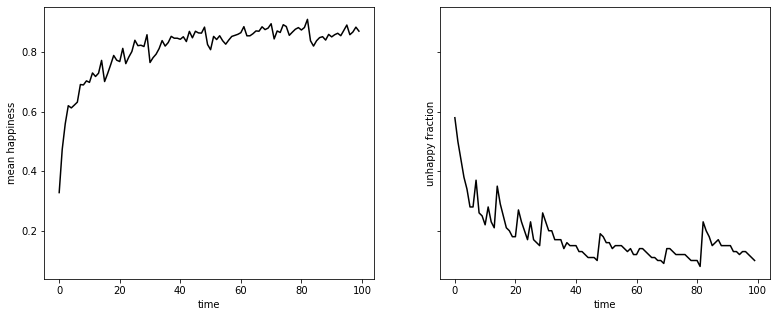

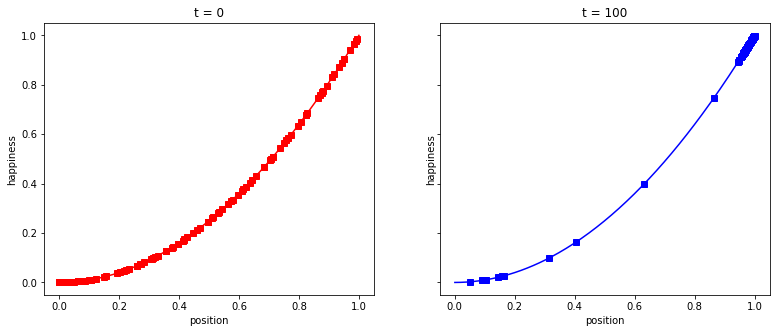

In [3]:
import numpy as np
import random
from matplotlib import pyplot as plt
import math

N=100 # number of people
tf=100 # number of turns
[t,X,h,n]=tXhn(N,tf,2)

fig, ax = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
ax[0].plot(t,h,'k')
ax[1].plot(t,n/N,'k')
ax[0].set_xlabel('time')
ax[0].set_ylabel('mean happiness')
ax[1].set_xlabel('time')
ax[1].set_ylabel('unhappy fraction')

xvec=np.linspace(0, 1, num=200)
fig, bx = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

bx[0].plot(xvec,H(xvec,2),'r')
bx[0].plot(X[:,0],H(X[:,0],2),'rs')

bx[1].plot(xvec,H(xvec,2),'b')
bx[1].plot(X[:,tf-1],H(X[:,tf-1],2),'bs')

bx[0].set_xlabel('position')
bx[0].set_ylabel('happiness')
bx[1].set_xlabel('position')
bx[1].set_ylabel('happiness')
bx[0].set_title('t = 0')
bx[1].set_title('t = 100')



Broadly speaking, the mean happiness increases and the fraction of people that are unhappy decreases with time. The rate of increase/decrease for either value decreases. For the monotonically increasing function chosen here, this implies the positions become increasingly clustered near $x=1$ which is the local and global maxima. A decreasing fraction of people are being randomly redistributed in each turn. We see that this is indeed the case from the latter two graphs where the squares denote the positions of the different residents. At $t=0$, the distribution is uniform but at $t=100$ , only 9 of the 100 residents are not clustered near $x=1$.



**Effect of Resident Numbers:** The effect of $N$ is examined below for the same case as above. We do this for $N=10,100,1000,10000$.


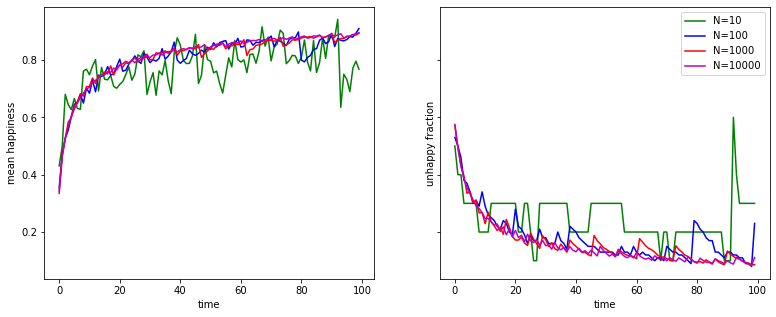

In [4]:
[tN10,XN10,hN10,nN10]=tXhn(10,tf,2)
[tN100,XN100,hN100,nN100]=tXhn(100,tf,2)
[tN1000,XN1000,hN1000,nN1000]=tXhn(1000,tf,2)
[tN10000,XN10000,hN10000,nN10000]=tXhn(10000,tf,2)


fig, ax = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

ax[0].set_xlabel('time')
ax[0].set_ylabel('mean happiness')
l1,=ax[0].plot(tN10,hN10,'g', label='N=10')
l2,=ax[0].plot(tN100,hN100,'b', label='N=100')
l3,=ax[0].plot(tN1000,hN1000,'r', label='N=1000')
l4,=ax[0].plot(tN10000,hN10000,'m', label='N=10000')

plt.legend(handles=[l1,l2,l3,l4], loc='upper right')

ax[1].set_xlabel('time')
ax[1].set_ylabel('unhappy fraction')
l1,=ax[1].plot(tN10,nN10/10,'g', label='N=10')
l2,=ax[1].plot(tN100,nN100/100,'b', label='N=100')
l3,=ax[1].plot(tN1000,nN1000/1000,'r', label='N=1000')
l4,=ax[1].plot(tN10000,nN10000/10000,'m', label='N=10000')


The four plots above all display qualitatively similar behavior for short times here. It appears that an increasing $N$ results in progressively smoother curves with the curve for $N=10000$ being virtually smooth with mean happiness almost monotonically increasing and the unhappy fraction monotonically decreasing. As $N$ decreases, the deviations from the smooth curve grow in magnitude. For the $N=10$ case there is considerable departure from the smooth curve particularly in the unhappy fraction. This is because the unhappy fraction cannot be less than $1/N$ for any $N$ since there is atleast one resident who is unhappy at any instant. As a result when $n^t/N$ approaches $1/N$ (here 0.1) the departure becomes strong. This is also reflected in the mean happiness for $N=10$.


**Effect of Run-Time:** Next, we shall look at what happens for the above case of $h(x)=x^2$ and $N=10,100,1000$ for $t_f=10^4$. 



In [5]:
[tN10,XN10,hN10,nN10]=tXhn(10,10000,2)
[tN100,XN100,hN100,nN100]=tXhn(100,10000,2)
[tN1000,XN1000,hN1000,nN1000]=tXhn(1000,10000,2)

(0.0, 1.0)

<Figure size 432x288 with 0 Axes>

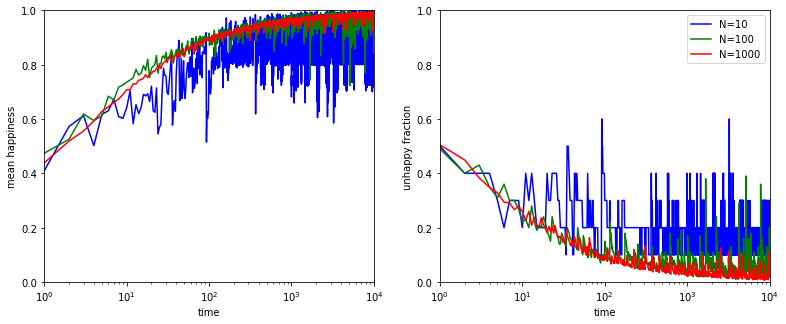

In [6]:
plt.figure()

plt.subplots(figsize=(13, 5))

plt.subplot(121)
l1,=plt.plot(tN10,hN10,'b', label='N=10')
l2,=plt.plot(tN100,hN100,'g', label='N=100')
l3,=plt.plot(tN1000,hN1000,'r', label='N=1000')
plt.xlabel('time')
plt.ylabel('mean happiness')
plt.xscale('log')
plt.xlim(1,10000)
plt.ylim(0,1)

plt.subplot(122)
l1,=plt.plot(tN10,nN10/10,'b', label='N=10')
l2,=plt.plot(tN100,nN100/100,'g', label='N=100')
l3,=plt.plot(tN1000,nN1000/1000,'r', label='N=1000')
plt.legend(handles=[l1,l2,l3], loc='upper right')
plt.xlabel('time')
plt.ylabel('unhappy fraction')
plt.xscale('log')
plt.xlim(1,10000)
plt.ylim(0,1)

As seen from the above plots $h^t$ approaches 1 and $n^t/N$ approaches 0 as $t\gg 1$. It is apparent from the $N=10$ case that $n^t/N\geq1/N$. For $N=100,1000$, as $n^t/N\sim 1/N$ the qualitative behavior changes and the deviations from a smooth curve become larger with the local expected value remaining close to $1$ for $h^t$ and $0$ for $n^t$. To understand this approach of $h^t$ and $n^t/N$ to $1$ and $0$ we look at the deviation in the log scale below.

<Figure size 432x288 with 0 Axes>

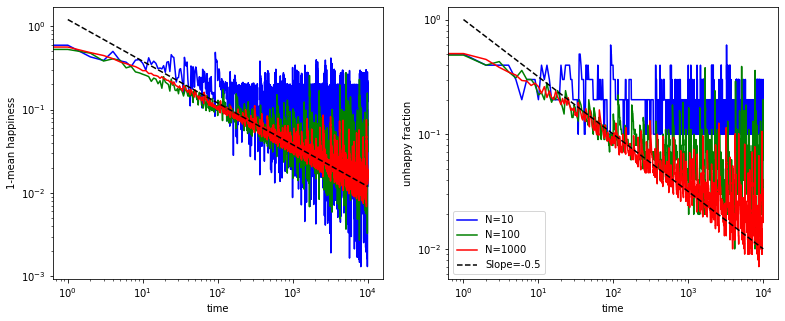

In [7]:
plt.figure()
p=2
# linear
plt.subplots(figsize=(13, 5))

plt.subplot(121)
l1,=plt.plot(tN10,1-hN10,'b', label='N=10')
l2,=plt.plot(tN100,1-hN100,'g', label='N=100')
l3,=plt.plot(tN1000,1-hN1000,'r', label='N=1000')
l4,=plt.plot(tN10+1,1.2*pow(p/2,0.5)*pow(tN10+1,-0.5),'k--', label='Slope=-0.5')

plt.xlabel('time')
plt.ylabel('1-mean happiness')
plt.xscale('log')
plt.yscale('log')


# log
plt.subplot(122)
l1,=plt.plot(tN10,nN10/10,'b', label='N=10')
l2,=plt.plot(tN100,nN100/100,'g', label='N=100')
l3,=plt.plot(tN1000,nN1000/1000,'r', label='N=1000')
l4,=plt.plot(tN10+1,pow(p/2,0.5)*pow(tN10+1,-0.5),'k--', label='Slope=-0.5')

plt.legend(handles=[l1,l2,l3,l4], loc='lower left')
plt.xlabel('time')
plt.ylabel('unhappy fraction')
plt.xscale('log')
plt.yscale('log')


Interestingly, the rate of approach is linear in the log-log space for both $h^t$ and $n^t$ implying a power law atleast till effects associated with the discreteness of $n^t$ manifest. Remarkably, the mean slope in either case is exactly $-0.5$ for both plots, we shall illustrate why this is the case in a later section.

**__Effect of Magnitudes__:** Let us now turn our attention to the effect of varying $p$ for a function of the form $h(x)=x^p$. We chose $p=1,2,3$ for $N=1000$ the results are as follows:

<Figure size 432x288 with 0 Axes>

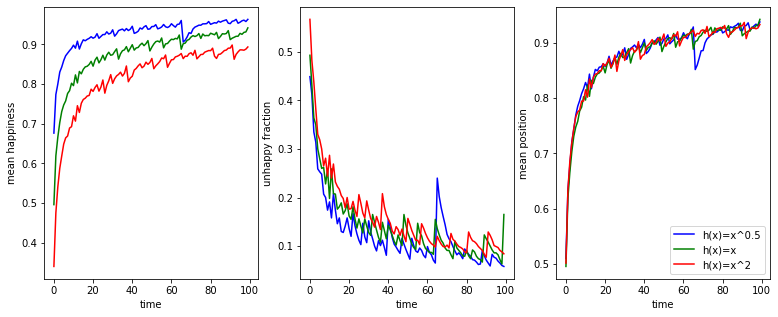

In [8]:
N=1000
plt.figure()
[t0_5,X0_5,h0_5,n0_5]=tXhn(N,tf,0.5)
[t1,X1,h1,n1]=tXhn(N,tf,1)
[t2,X2,h2,n2]=tXhn(N,tf,2)
# linear
plt.subplots(figsize=(13, 5))

plt.subplot(131)
l1,=plt.plot(t0_5,h0_5,'b', label='h(x)=x^0.5')
l2,=plt.plot(t1,h1,'g', label='h(x)=x')
l3,=plt.plot(t2,h2,'r', label='h(x)=x^2')
plt.xlabel('time')
plt.ylabel('mean happiness')



plt.subplot(132)
l1,=plt.plot(t0_5,n0_5/N,'b', label='h(x)=x^0.5')
l2,=plt.plot(t1,n1/N,'g', label='h(x)=x')
l3,=plt.plot(t2,n2/N,'r', label='h(x)=x^2')
plt.xlabel('time')
plt.ylabel('unhappy fraction')

plt.subplot(133)
l1,=plt.plot(t0_5,np.mean(X0_5,0),'b', label='h(x)=x^0.5')
l2,=plt.plot(t1,np.mean(X1,0),'g', label='h(x)=x')
l3,=plt.plot(t2,np.mean(X2,0),'r', label='h(x)=x^2')

plt.xlabel('time')
plt.ylabel('mean position')
plt.legend(handles=[l1,l2,l3], loc='lower right')

Once again we find the mean happiness broadly increasing in all cases and the unhappy fraction broadly decreasing. What is interesting to note is that while the mean happiness forms three separate distinct curves, the unhappy fraction and the mean position nearly overlap. This indicates that the exact $h(x)$ is less relevant to the process than its relative shape as defined by the positions and ordering of its local maxima, minima and discontinuities. Note that from the cases seen so far, the residents tend to localize to the right which is a maxima with the minima having no discernible effect. 

Additionally, the overlap of the unhappy fraction and mean position has the added implication that the approach to the eventual value of $h^t$ to $1$ and $n^t/N$ to $0$ is a power law with exponent $-0.5$ for all three cases. 

**__Identical Maxima:__** We shall now consider what happens when we have curves with multiple identical maxima. we choose the function $h(x)= \sin^2{(\pi p x)}$ :

In [9]:
def H(t,p): # happiness function
    return(pow(np.sin(t*p*np.pi),2))

(0.0, 1.0)

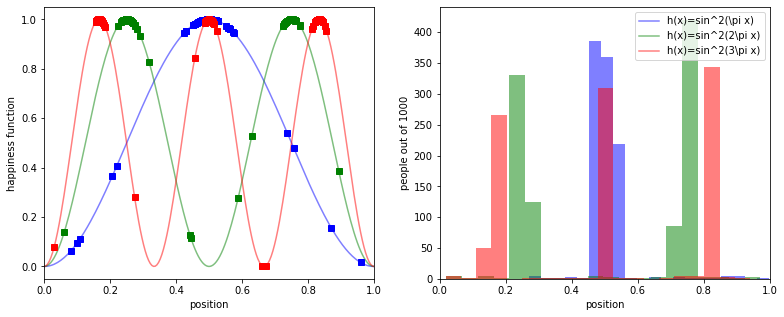

In [10]:
xvec=np.linspace(0, 1, num=200)
Hvec1=H(xvec,1)
Hvec2=H(xvec,2)
Hvec3=H(xvec,3)

[t1,X1,h1,n1]=tXhn(100,tf,1)
[t2,X2,h2,n2]=tXhn(100,tf,2)
[t3,X3,h3,n3]=tXhn(100,tf,3)

plt.subplots(figsize=(13, 5))
plt.subplot(121)
l1,=plt.plot(xvec,Hvec1,'b', label='h(x)=sin^2(\pi x)', alpha=0.5)
l2,=plt.plot(xvec,Hvec2,'g', label='h(x)=sin^2(2\pi x)', alpha=0.5)
l3,=plt.plot(xvec,Hvec3,'r', label='h(x)=sin^2(3\pi x)', alpha=0.5)
p1=plt.plot(X1[:,tf-1],H(X1[:,tf-1],1),'bs')
p2=plt.plot(X2[:,tf-1],H(X2[:,tf-1],2),'gs')
p3=plt.plot(X3[:,tf-1],H(X3[:,tf-1],3),'rs')

plt.xlabel('position')
plt.ylabel('happiness function')
plt.xlim(0,1)

plt.subplot(122)

N=1000
[t1,X1,h1,n1]=tXhn(N,tf,1)
[t2,X2,h2,n2]=tXhn(N,tf,2)
[t3,X3,h3,n3]=tXhn(N,tf,3)
num_bins = 20

plt.hist(X1[:,tf-1], num_bins, facecolor='blue', alpha=0.5)
plt.hist(X2[:,tf-1], num_bins, facecolor='green', alpha=0.5)
plt.hist(X3[:,tf-1], num_bins, facecolor='red', alpha=0.5)

plt.legend(handles=[l1,l2,l3], loc='upper right')
plt.xlabel('position')
plt.ylabel('people out of 1000')
plt.xlim(0,1)

The plot to the left shows the localization of $N=100$ residents at $t=100$ for $p=1,2,3$. It is clear that only a few residents are not localized on a maxima for all three cases. To see the precise distribution of particles among the three maxima, we look at the histogram to the right for $N=1000$ and add up tho two largest bars near each maxima. Thus, one can gather that the distribution of the particles are uniform across all $p$ local maxima with the same value of happiness.

**__Equivalued Maxima:__** Equidistribution is not surprising for the chosen functions which have discrete translational symmetry. We shall now see what happens when this is no longer the case by choosing a function of the form $h(x)= \sin^2{3\pi x^p}$.

In [11]:
def H(t,p): # happiness function
    return(pow(np.sin(pow(t,p)*3*np.pi),2))

(0.0, 1.0)

<Figure size 432x288 with 0 Axes>

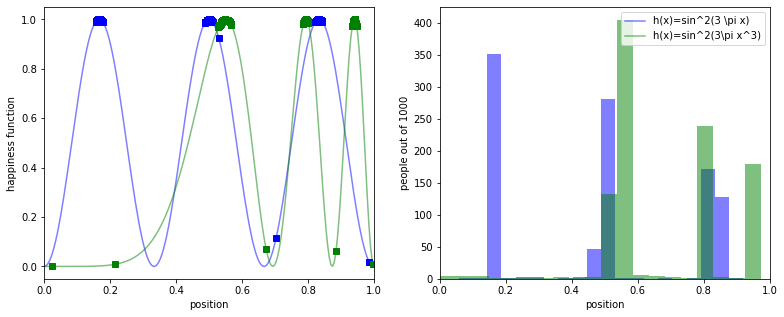

In [12]:
xvec=np.linspace(0, 1, num=200)
Hvec1=H(xvec,1)
Hvec3=H(xvec,3)

[t1,X1,h1,n1]=tXhn(100,tf,1)
[t3,X3,h3,n3]=tXhn(100,tf,3)

plt.figure()
plt.subplots(figsize=(13, 5))

plt.subplot(121)
l1,=plt.plot(xvec,Hvec1,'b', label='h(x)=sin^2(3 \pi x)', alpha=0.5)
l3,=plt.plot(xvec,Hvec3,'g', label='h(x)=sin^2(3\pi x^3)', alpha=0.5)
p1=plt.plot(X1[:,tf-1],H(X1[:,tf-1],1),'bs')
p3=plt.plot(X3[:,tf-1],H(X3[:,tf-1],3),'gs')

plt.xlabel('position')
plt.ylabel('happiness function')
plt.xlim(0,1)

plt.subplot(122)

N=1000
[t1,X1,h1,n1]=tXhn(N,tf,1)
[t3,X3,h3,n3]=tXhn(N,tf,3)
num_bins = 20

plt.hist(X1[:,tf-1], num_bins, facecolor='blue', alpha=0.5)
plt.hist(X3[:,tf-1], num_bins, facecolor='green', alpha=0.5)

plt.legend(handles=[l1,l3], loc='upper right')
plt.xlabel('position')
plt.ylabel('people out of 1000')
plt.xlim(0,1)

We find that even when the translational symmetry is broken, all but few residents localize on the three maxima. The distribution however, is no longer uniform across all three identical local maxima as seen from the green curve and its corresponding histogram. The broader the particular local maxima, the larger the proportion of residents that localize there. 

**__Single Global Maxima:__** We shall now look at the case where there is a single global maxima but multiple local maxima using the function $h(x)= x^p\sin^2{3\pi x}$ for $p=0,1$ :

In [13]:
def H(t,p): # happiness function
    return(pow(t,p)*pow(np.sin(3*np.pi*t),2))

(0.0, 1.0)

<Figure size 432x288 with 0 Axes>

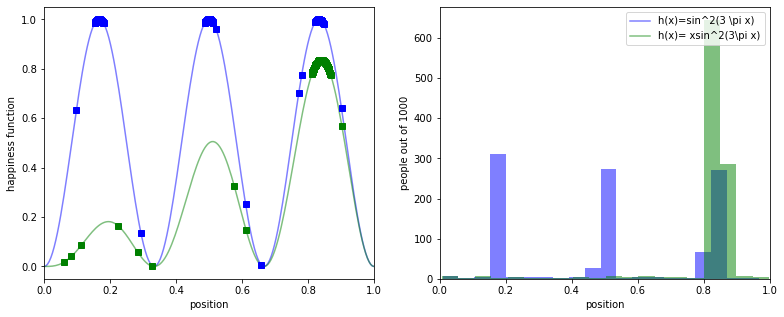

In [14]:
xvec=np.linspace(0, 1, num=200)
Hvec1=H(xvec,0)
Hvec3=H(xvec,1)

[t1,X1,h1,n1]=tXhn(100,tf,0)
[t3,X3,h3,n3]=tXhn(100,tf,1)

plt.figure()
plt.subplots(figsize=(13, 5))

plt.subplot(121)
l1,=plt.plot(xvec,Hvec1,'b', label='h(x)=sin^2(3 \pi x)', alpha=0.5)
l3,=plt.plot(xvec,Hvec3,'g', label='h(x)= xsin^2(3\pi x)', alpha=0.5)
p1=plt.plot(X1[:,tf-1],H(X1[:,tf-1],0),'bs')
p3=plt.plot(X3[:,tf-1],H(X3[:,tf-1],1),'gs')

plt.xlabel('position')
plt.ylabel('happiness function')
plt.xlim(0,1)

plt.subplot(122)

N=1000
[t1,X1,h1,n1]=tXhn(N,tf,0)
[t3,X3,h3,n3]=tXhn(N,tf,1)
num_bins = 20

plt.hist(X1[:,tf-1], num_bins, facecolor='blue', alpha=0.5)
plt.hist(X3[:,tf-1], num_bins, facecolor='green', alpha=0.5)

plt.legend(handles=[l1,l3], loc='upper right')
plt.xlabel('position')
plt.ylabel('people out of 1000')
plt.xlim(0,1)

From the above two plots we can infer that even in relatively short times the residents localize near the global maxima even when there are multiple other lesser local maxima. It is only when there are equivalued global maxima that the residents distribute themselves in some proportion depending on the sharpness.


**__Analysis for Infinite Residents__**

All though we have inferred some general properties of the Pursuit of Happiness process, we note that it is a stochastic process defined on a continuous state space and on discrete time. the analysis of such a process in its general form is much beyond the scope of this project. However, some rigorous progress is possible in the limit $N\rightarrow \infty$. This is done by making use the Ergodic theorem which is stated in this context as follows:

*Theorem:* Let $\langle a,b \rangle=\{x:a\leq h(x)\leq b\}$, if $\chi_k$ are i.i.d in $\langle a,b\rangle$ for $1\leq k \leq M$ then,
$$ \lim_{M\rightarrow \infty} \frac1{M}\sum_{k=1}^M h(\chi_k)=\frac{\int_{\langle a,b\rangle} h d\mu}{\int_{\langle a,b \rangle} d\mu}.$$

From the initial conditions and above theorem, we have at $t=0$ and $t=1$: $$n^0=N \mathrm{\ \  and\ \ } h^0=\int_{\langle0,1\rangle}hd\mu,$$ 
 
 $$n^1=n^0 \int_{\langle 0,h^{0}\rangle} d\mu \mathrm{\ \  and\ \ }  Nh^1=n^1\int_{\langle0,1\rangle}hd\mu + n^0 \int_{\langle h^0,1\rangle}hd\mu .$$ 
Iteratively, it may be shown that the following recurrence relation holds:
$$n^{t}=n^{t-1}\int_{\langle0,h^{t-1}\rangle} d\mu+\sum^{t-2}_{i=0} n^{i} \int_{\langle h^{t-2},h^{t-1}\rangle} d\mu \mathrm{\ \  and\ \ } Nh^{t}={n^{t}}\int_{\langle0,1\rangle}h d\mu+\sum^{t-1}_{i=0} n^{i} \int_{\langle h^{t-1},1\rangle} hd\mu.$$

Therefore, in theory, given any $h(x)$ that is Lebesgue integrable, for the limit of $N\to \infty$, we can obtain $h^t$ and $n^t$ for all time by marching forward using the above recurrence relations. 


**__Invertible Functions:__** For ease of implementation, we restrict ourselves the special case of invertible functions. That is for functions $h:[0,1]\rightarrow [0,1]$ for which there exists another function $g:[0,1]\rightarrow [0,1]$, such that $h(g(x))=x$. For this case, the recurrence relations simplify considerably. This of course implies that any $h(x)$ that is continuous is monotonically increasing or decreasing. We shall assume without loss of generality that it is monotonically increasing. In this case the relations become the much more tractable:
$$ s^t = s^{t-1} g(h^{t-1})+1 \mathrm{\ \ and \ \ } h^t = s^t \int^1_0 h(z) dz - s^{t-1} \int^{g(h^{t-1})}_0 h(z) dz ,$$
where $s^t=\frac{1}{N}\sum^{t}_{i=0}n^i$ and $n^t = s^t - s^{t-1} $.

Below we define the inverse and primitive for $h(x)=x^p$ and compare the process with the above recurrence relation for $p=2$.

In [15]:
def H(t,p): # happiness function
    return(pow(t,p))

In [16]:
def G(t,p): # Inverse happiness
    return(pow(t,1/p))

In [17]:
def IntH(a,b,p): # integral of happiness
    return((pow(b,p+1)-pow(a,p+1))/(p+1))

Text(0, 0.5, 'unhappy fraction')

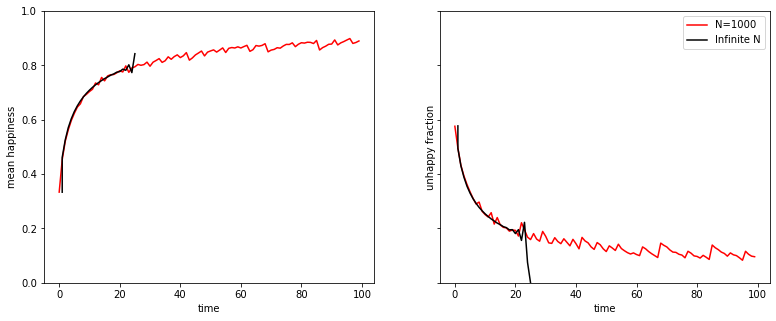

In [18]:
N=1000
tf=100
p=2
L=26
[t,X,h,n]=tXhn(N,tf,p)


ht = np.zeros(L) # theory happiness vector
Nt = np.zeros(L) # theory number of unhappy people
I = np.zeros(L) # theory time
St = np.zeros(L) # number sum of unhappy people


I[0]=1
Nt[0]=N
St[0]=N
ht[0]=IntH(0,1,p)
for i in range(1, L):
    St[i]=St[i-1]*G(ht[i-1],p)+N
    ht[i]=(St[i]*IntH(0,1,p)-St[i-1]*IntH(0,G(ht[i-1],p),p))/N
    I[i]=i
    Nt[i-1]=St[i]-St[i-1]
fig, ax = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
l1,=ax[0].plot(t,h,'r',label='N=1000')
l2,=ax[0].plot(I,ht,'k',label='Infinite N')
plt.legend(handles=[l1,l2], loc='upper right')
ax[0].set_xlabel('time')
ax[0].set_ylabel('mean happiness')
ax[0].set_ylim(0,1)

m1,=ax[1].plot(t,n/N,'r')
m2,=ax[1].plot(I,Nt/N,'k')
ax[1].set_xlabel('time')
ax[1].set_ylabel('unhappy fraction')


It can be seen that the recurrence relation agrees very well till $t\approx 20$ but then diverges. Numerical instabilities in a non-linear recurrence relation such as ours are a well known hard problem for which no general method for solution upto quadrature exists, even for an invertible $h(x)$. Despite this limitation, these equations can be used with some success, atleast for the initial evolution. Their true usefulness however is in the derivation of asymptotic or limiting behavior.

**__Long Time Asymptotics__:** Some important insight can be gained into the general case by considering a function of the form: $h(x)=1-(1-x)^p$. It has an inverse $g(x)=1-(1-x)^{1/p}$. The important feature of these class of functions are that they all have a global maxima at $x=1$ but character of this maxima depends on $p$. For example for $p=1$ it is a straight line with finite first derivative at $x=1$, but for $p=2$ it forms a parabola with only a finite second derivative. 

Substituting an ansatz of the form $h^t=1-\alpha t^{\beta}$ where $\alpha>0$ and $\beta<0$ into the simplified recurrence relation for invertible functions, we can show after some cumbersome algebra that for any $p>0$.:
$$h^t=1-(p(p+1))^\beta t^\beta+\mathcal{O}(t^{2\beta}) \mathrm{\ \ and \ \ } n^t=Np^{\beta+1}(p+1)^\beta t^\beta + \mathcal{O}(t^{2\beta}) \mathrm{\ \ where \ \ }\beta=\frac{-p}{p+1}.$$
Comparing the results below for $N=1000$ and $p=1,2,3$:

In [19]:
def H(t,p): # happiness function
    return(1-pow(1-t,p))

In [20]:
def G(t,p): # Inverse happiness
    return((1-pow(1-t,1/p)))

In [21]:
def IntH(a,b,p): # integral of happiness
    return(b-a +(pow(1-b,p+1)-pow(1-a,p+1))/(p+1))

In [22]:
def HT(t,p): # Asymptotic Mean Happiness
    return(1-pow(1/(p*(p+1)),p/(p+1))*pow(t,-p/(p+1)))

In [23]:
def NTbN(t,p): # Asymptotic unhappy fraction
    return(p*pow(p*(p+1)*t,-p/(p+1)))

Text(0, 0.5, 'unhappy fraction')

<Figure size 432x288 with 0 Axes>

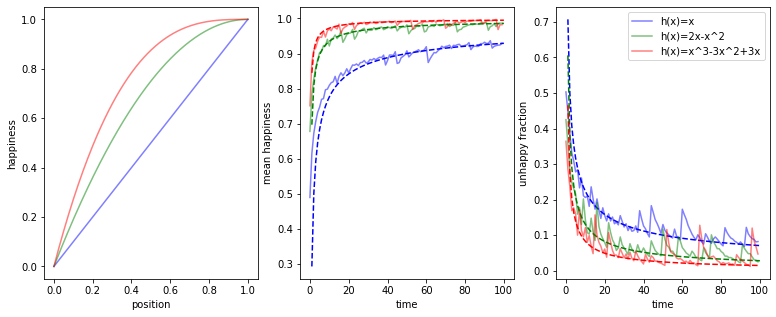

In [24]:
N=1000
tf=100
xvec=np.linspace(0, 1, num=200)
Hvec1=H(xvec,1)
Hvec2=H(xvec,2)
Hvec3=H(xvec,3)

[t1,X1,h1,n1]=tXhn(N,tf,1)
[t2,X2,h2,n2]=tXhn(N,tf,2)
[t3,X3,h3,n3]=tXhn(N,tf,3)
plt.figure()
plt.subplots(figsize=(13, 5))

plt.subplot(131)
l1,=plt.plot(xvec,Hvec1,'b', label='h(x)=x', alpha=0.5)
l2,=plt.plot(xvec,Hvec2,'g', label='h(x)=2x-x^2', alpha=0.5)
l3,=plt.plot(xvec,Hvec3,'r', label='h(x)=x^3-3x^2+3x', alpha=0.5)

plt.xlabel('position')
plt.ylabel('happiness')

plt.subplot(132)
p1,=plt.plot(t1,h1,'b', label='h(x)=x', alpha=0.5)
q1,=plt.plot(t+1,HT(t+1,1),'b--')
p2,=plt.plot(t2,h2,'g', label='h(x)=2x-x^2', alpha=0.5)
q2,=plt.plot(t+1,HT(t+1,2),'g--')
p3,=plt.plot(t3,h3,'r', label='h(x)=x^3-3x^2+3x', alpha=0.5)
q3,=plt.plot(t+1,HT(t+1,3),'r--')
plt.xlabel('time')
plt.ylabel('mean happiness')

plt.subplot(133)
r1,=plt.plot(t1,n1/N,'b', label='h(x)=x', alpha=0.5)
s1,=plt.plot(t+1,NTbN(t+1,1),'b--')
r2,=plt.plot(t2,n2/N,'g', label='h(x)=2x-x^2', alpha=0.5)
s2,=plt.plot(t+1,NTbN(t+1,2),'g--')
r3,=plt.plot(t3,n3/N,'r', label='h(x)=x^3-3x^2+3x', alpha=0.5)
s3,=plt.plot(t+1,NTbN(t+1,3),'r--')
plt.legend(handles=[r1,r2,r3], loc='upper right')


plt.xlabel('time')
plt.ylabel('unhappy fraction')



In the above figures, the dashed lines are the asymptotic resutls. From them we see that there is very close agreement with the asymptotic long time resuts for $t\geq20$ validating our method. Based on this, we hypothesize the following.

**_Conjecture:_** For any general curve $h(x)$ which is differentiable and has a unique global maxima at $x=M$, the approach of the $h^t$ to $1$ and $n^t/N$ to $0$ for $N\to \infty$ and as $t\gg1$ scales to leading order as $t^{-p/(p+1)}$ ($p>0$) where the $p$-th derivative is the first non-zero derivative at $x=M$.

We have already seen some evidence of the above conjecture from our observations for $h(x)=x^p$ where a scaling exponent of $-0.5$ was observed for both mean happiness and unhappy fraction.

**Summary:**

The Pursuit of Happiness process is fully defined by the vector of the positions of the residents at all times for a given happiness function. It can be effectively monitored either by looking at the mean happiness or the fraction of residents that are unhappy at any instant. The mean happiness approaches the global maxima value while the unhappy fraction first diminishes till it is comparable to $1/N$ after which it remains more or less a constant with large fluctuations. This corresponds with the clustering of the residents near the global maxima. The process is not very sensitive the the exact function and depends primarily on its relative shape determined by the number and positions of the equivalued global maxima. The residents are indifferent to all minima and non-global maxima. In case of equivalued global maxima, the fraction of residents are clustered near each are finite and inversely related with its sharpness. In the limit of $N\rightarrow \infty$, an exact recurrence relation for the mean happiness and unhappy fraction can be derived for any Lebesgue integrable $h(x)$. The equations compare very well with simulations till $t\sim O(10)$ after which the error diverges. From these equations however, fairly general asymptotic scaling of mean happiness and unhappy fraction can be derived for long times to good agreement with simulations.